# notebook: segmenting nuclei with the stardist napari plugin

## Overview

Plugins extend the functionality of napari and can be combined together to build workflows. Many plugins exist for common analysis tasks such as segmentation and filtering. In this activity, we will segment nuclei using the [stardist napari plugin](https://github.com/stardist/stardist-napari). Please visit the [napari hub](https://www.napari-hub.org/) for a listing of the available plugins.

### Data source

The data were downloaded from the [OpticalPooledScreens github repository](https://github.com/feldman4/OpticalPooledScreens).

## Loading the data

We will start by loading an image of DAPI stained nuclei. We can use `scikit-image`'s `imread()` function to download the data from the link below and load it into a numpy array called `nuclei`.

In [1]:
from skimage import io

url = 'https://raw.githubusercontent.com/kevinyamauchi/napari-spot-detection-tutorial/main/data/nuclei_cropped.tif'
nuclei = io.imread(url)

## Viewing the image

As we did in the previous notebooks, we can view the image in napari using the `napari.view_image()` function. Here we set the colormap to `magma`.

In [2]:
import napari

viewer = napari.view_image(nuclei, colormap='magma')

Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
1/1 [==============================] - 0s 439ms/step


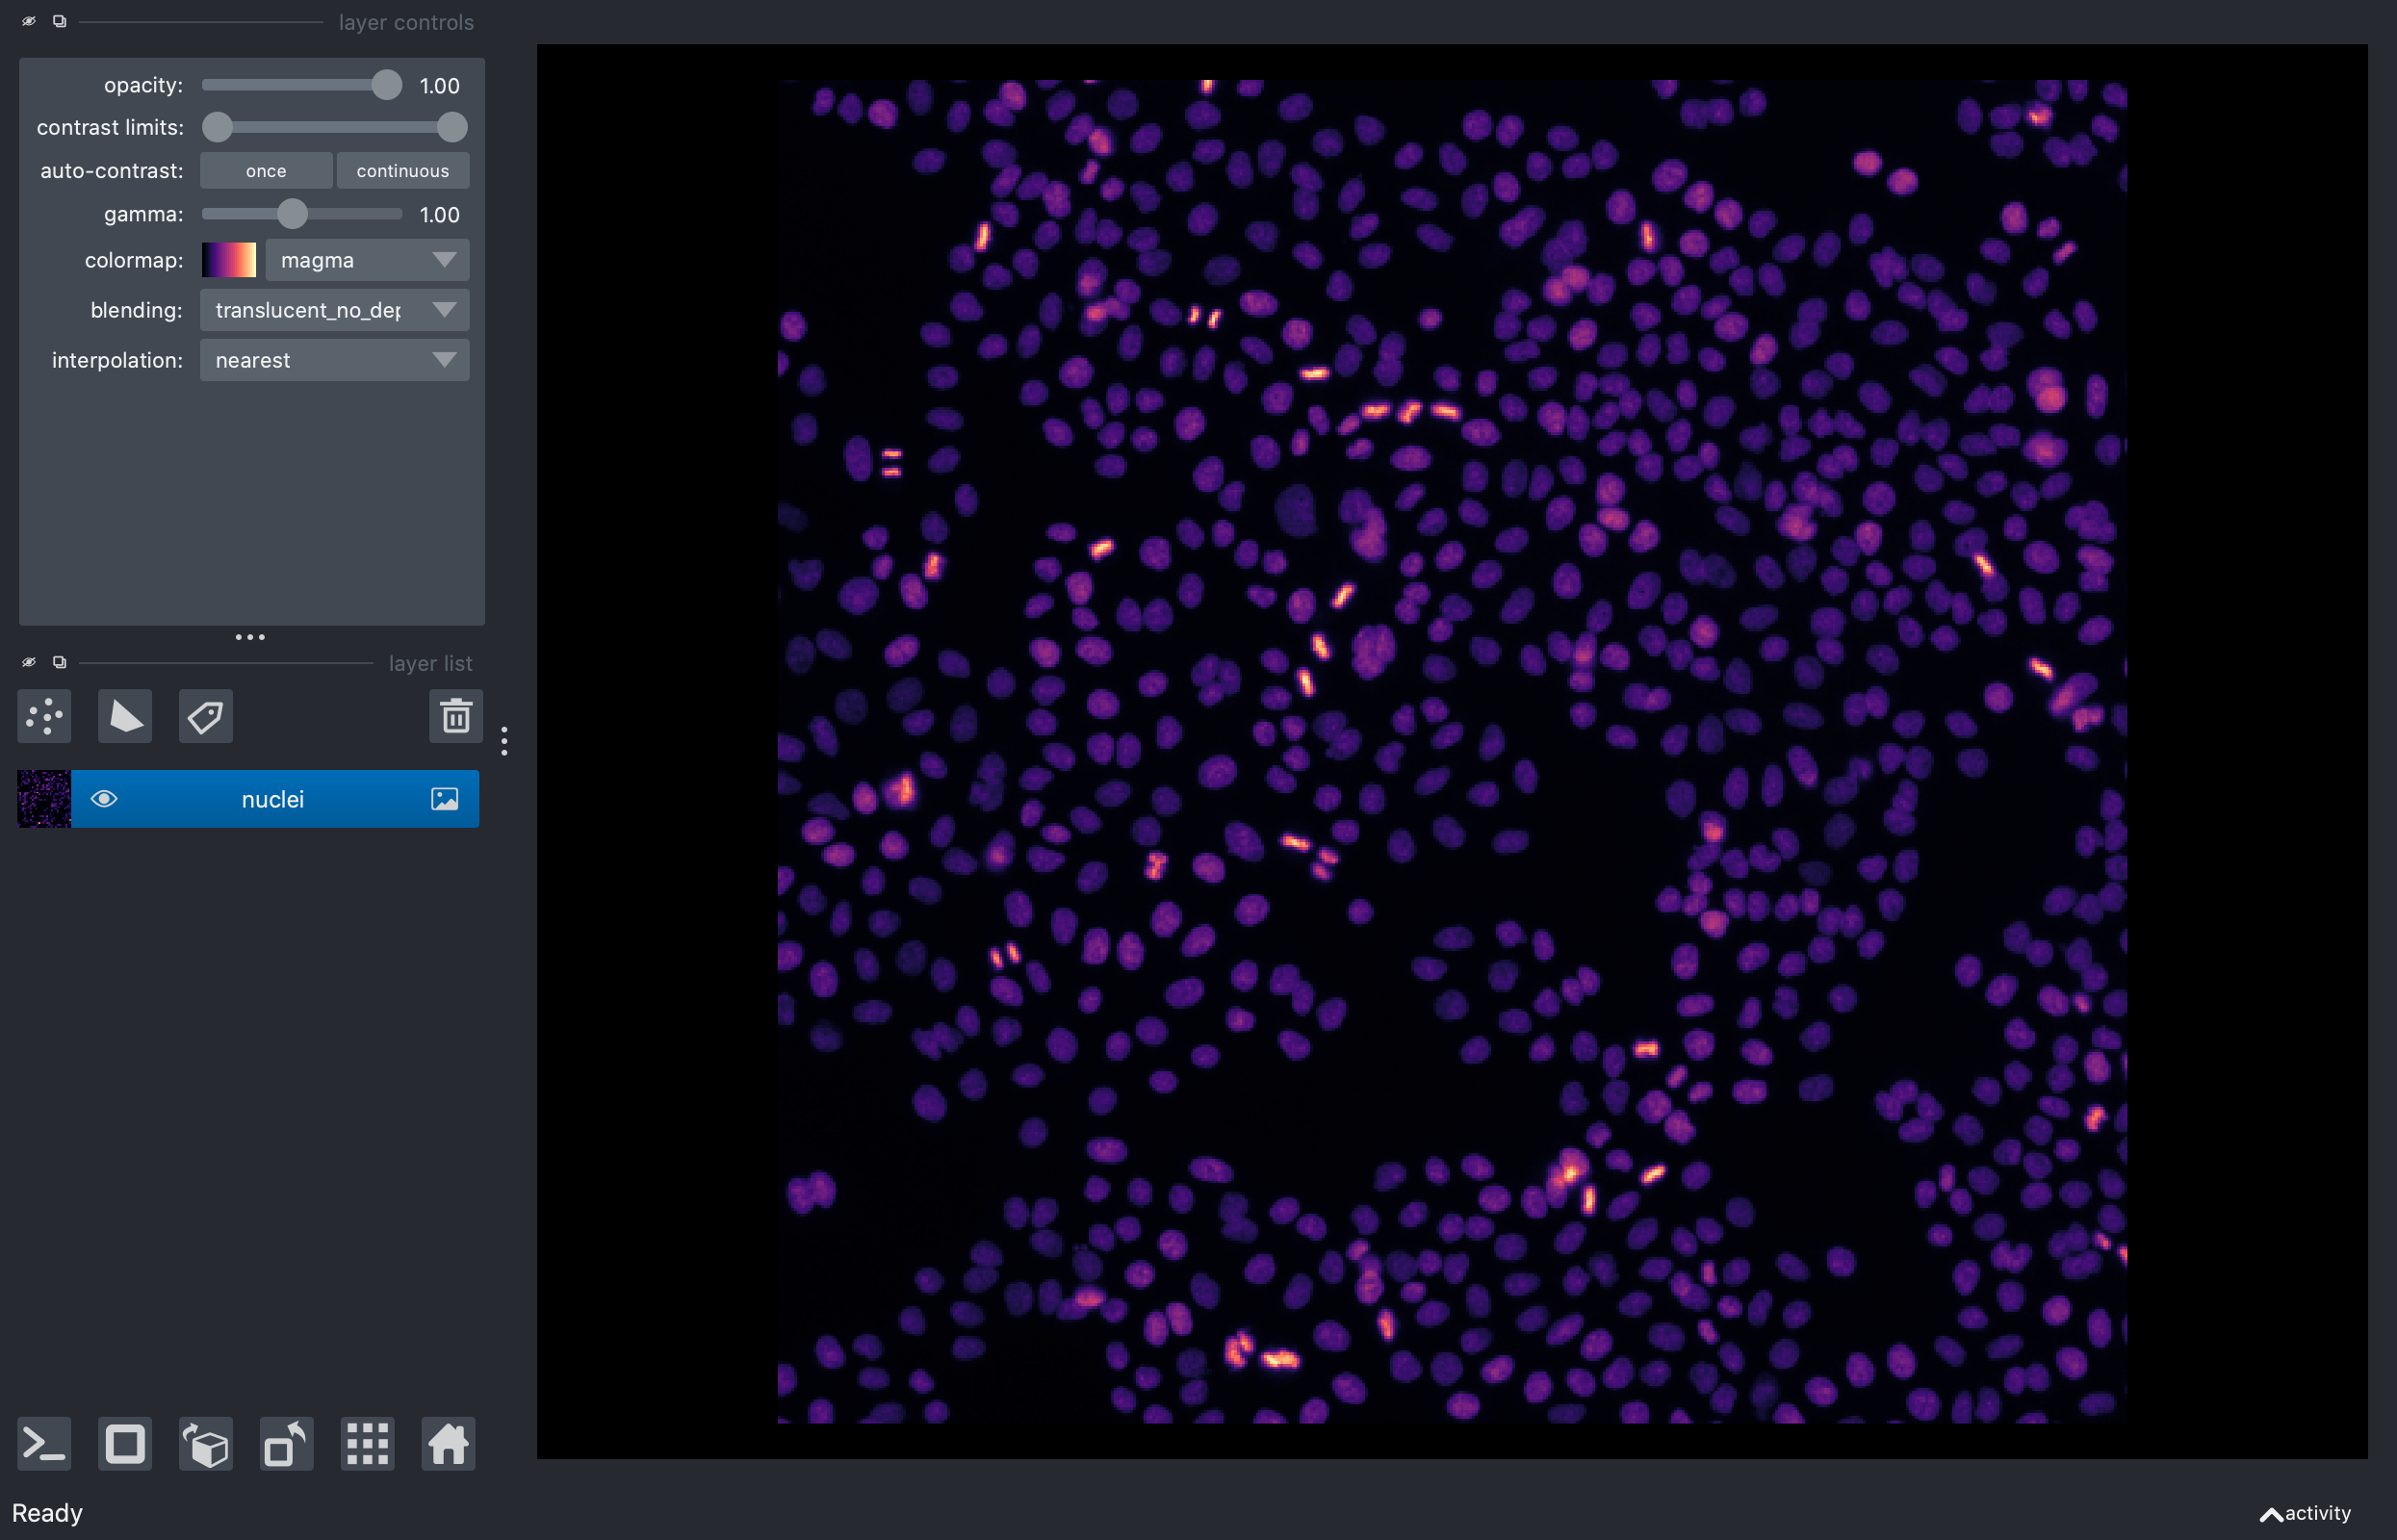

In [9]:
from napari.utils import nbscreenshot

nbscreenshot(viewer)

## Segment nuclei

To segment the nuclei, we will use the [stardist napari plugin](https://github.com/stardist/stardist-napari). Please perform the segmentation using the instructions below. For more information on stardist, please see the [papers](https://github.com/stardist/stardist#stardist---object-detection-with-star-convex-shapes) and [repository](https://github.com/stardist/stardist).

1. Start the stardist plugin. From the menu bar, click Plugins->stardist-napari:StarDist. You should see the plugin added to the right side of the viewer. If this is your first time opening the plugin, it may take a minute to open while the neural network models are being downloaded.

<img src="https://raw.githubusercontent.com/alisterburt/napari-workshops/main/napari-workshops/notebooks/resources/stardist_plugin.png" alt="stardist plugin"  width="80%">


2. Select the "nuclei" image layer.

<img src="https://raw.githubusercontent.com/alisterburt/napari-workshops/main/napari-workshops/notebooks/resources/stardist_screenshots_image_selection.png" alt="select the image layer"  width="80%">


3. Set the model type to "2D"

<img src="https://raw.githubusercontent.com/alisterburt/napari-workshops/main/napari-workshops/notebooks/resources/stardist_screenshots_model_type_selection.png" alt="select the 2D model"  width="80%">

4. Select the "Versatile (fluorescent nuclei)" pretrained model

<img src="https://raw.githubusercontent.com/alisterburt/napari-workshops/main/napari-workshops/notebooks/resources/stardist_screenshots_model_selection.png" alt="select the Versatile model"  width="80%">


5. Check the "Normalize Image" checkbox and set the low and high percentiles to 1.00 and 99.80, respectively. Normalizing the image is important to ensure the intensity distribution is as similar as possible to the distribution the stardist model was trained on.

<img src="https://raw.githubusercontent.com/alisterburt/napari-workshops/main/napari-workshops/notebooks/resources/stardist_screenshots_preprocessing.png" alt="check the normalize image box"  width="80%">

6. You can leave the postprocessing options as their default values. Setting the "Probability / Score Threshold" to  higher values will likely reduce false positives, but also lead to fewer segmented objects. Increasing the "Overlap  Threshold" will allow objects to overlap more. Feel free to play around with the settings!

<img src="https://raw.githubusercontent.com/alisterburt/napari-workshops/main/napari-workshops/notebooks/resources/stardist_screenshots_postprocessing.png" alt="check the normalize image box"  width="80%">

7. You can leave the "Advanced Options" as their default values

<img src="https://raw.githubusercontent.com/alisterburt/napari-workshops/main/napari-workshops/notebooks/resources/stardist_screenshots_postprocessing.png" alt="check the normalize image box"  width="80%">

8. You are now ready to perform the segmentation! Press the "Run" button to start the segmentation. This may take a few minutes as we are running the computation on CPU. However, this would be much faster when using a GPU!

<img src="https://raw.githubusercontent.com/alisterburt/napari-workshops/main/napari-workshops/notebooks/resources/stardist_screenshots_run.png" alt="check the normalize image box"  width="80%">

9. When the segmentation is complete, you should see the results in the viewer. Two layers have been added to the viewer. "StarDist polygons" contains the outlines of the segmented cells as polygons as a Shapes layer and "StarDist labels" contains the dense instance segmentation as a Labels layer.

<img src="https://raw.githubusercontent.com/alisterburt/napari-workshops/main/napari-workshops/notebooks/resources/stardist_screenshots_segmentation.png" alt="check the normalize image box"  width="80%">

#  Bonus: Quantify nuclei shape

In this next section, we will compute and display some basic properties of the segmented cells (e.g., area) using scikit-image and matplotlib.

## Measure area and perimeter
`stardist` outputs the segmentation masks as a label image in a `Labels` layer called `'StarDist labels'`. In napari, we can access the layer data from the layer object's `data` property. As we did in the previous exercise, we can access the the layer object from the layer list by its name (`viewer.layers['StarDist labels']`). From that layer object, we can access the data.

We can use the scikit-image [`regionprops_table`](https://scikit-image.org/docs/dev/api/skimage.measure.html#skimage.measure.regionprops_table) function to measure the area and perimeter of the detected nuclei. `regionprops_table` outputs a dictionary where each key is a name of a measurement (e.g., `'area'`) and the value is the measurement value for each detected object (nucleus in the case).`

In [3]:
from skimage.measure import regionprops_table

# measure the area and nucleus for each nucleus
label_layer = viewer.layers['StarDist labels']
rp_table = regionprops_table(
    label_layer.data,
    properties=('area', 'perimeter')
)

In [4]:
rp_table

{'area': array([ 99, 107, 103, 120, 104, 116, 111,  97, 117, 123, 107,  88, 104,
        107, 107,  96, 110,  97,  82, 123, 106, 118, 117, 107,  83, 112,
        116,  93, 135,  97, 134, 111, 105,  96, 127,  97, 108, 102, 103,
        118, 109, 126, 106, 109,  97,  89, 115, 110, 106, 128, 104, 107,
        122,  98, 115, 114, 104, 100,  82, 118,  98, 106,  96, 130,  89,
         98, 102,  86, 144, 102,  90, 136,  97,  88, 118,  87, 126, 101,
        111,  96,  87, 110, 168, 102, 106, 112,  99,  99, 130,  94,  92,
         99,  99, 100,  94, 150, 107, 112,  77, 105,  89, 109,  92, 167,
         99, 117, 124, 129, 114, 105,  93, 104,  95,  80,  77, 106, 101,
        114, 103, 121, 102, 122, 101, 102,  87, 120,  86,  86, 122, 100,
         96,  96, 122, 128,  84, 111, 130,  89,  62, 161, 107, 101, 111,
         88, 151, 112, 115,  93,  89,  79,  86,  84, 118,  86, 118,  88,
        111, 107,  98,  93,  94, 110, 107, 118,  97, 121,  92, 111,  87,
        100, 101,  94,  98, 119, 100,  90, 

## Plotting results

Next, we use matplotlib to plot the results of our measurements. In the cell below, we plot a histogram of the area of the nuclei. 

median area: 94.0 px


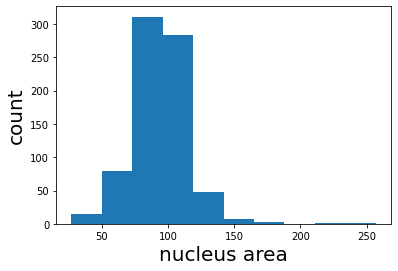

In [5]:
from matplotlib import pyplot as plt
import numpy as np


# print the median area
median_area = np.median(rp_table['area'])
print(f'median area: {median_area} px')

# plot a histogram of the areas
plt.hist(rp_table['area']);
plt.xlabel('nucleus area', fontsize=20);
plt.ylabel('count', fontsize=20);
plt.show()



Finally, we can calculate the circularity from the area and perimeter measurements we made above. The circularity is a shape factor that is 1 when the object is a circle and less than one for shapes that are more "starfish-like"/ The circularity is defined as

$$f_{circ} = \frac{4 \pi A}{P^2}$$

where A is the area and P is the perimeter of the object. We plot the circularity vs. the area and see that the circularity of the nuclei does not appear to depend on the area.


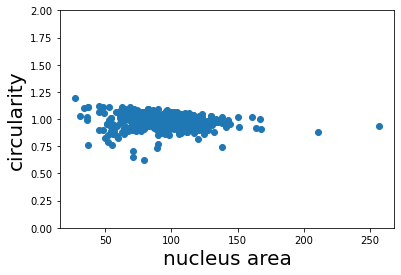

In [6]:
circularity = (4 * np.pi * rp_table['area']) / np.square(rp_table['perimeter'])

plt.scatter(rp_table['area'], circularity);
plt.xlabel('nucleus area', fontsize=20);
plt.ylabel('circularity', fontsize=20);
plt.ylim((0, 2))
plt.show()

# Conclusions

In this notebook, we have used the stardist-napari plugin to perform nucleus segmentation. We then used the results of the segmentation to inspect the relationship between nucleus area and circularity. This demonstration highlights how one can combine existing plugins and python libraries to make measurements on microscopy data.